# Decision Trees / Random Forest
This notebook studies how decision trees are used for classification and comparing it with random forest. The dataset used in the 
notebook can be found at https://www.kaggle.com/abbasit/kyphosis-dataset 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading & Exploring Data

In [2]:
data = pd.read_csv('kyphosis.csv')

In [3]:
data.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [4]:
pd.value_counts(data['Kyphosis'])

absent     64
present    17
Name: Kyphosis, dtype: int64

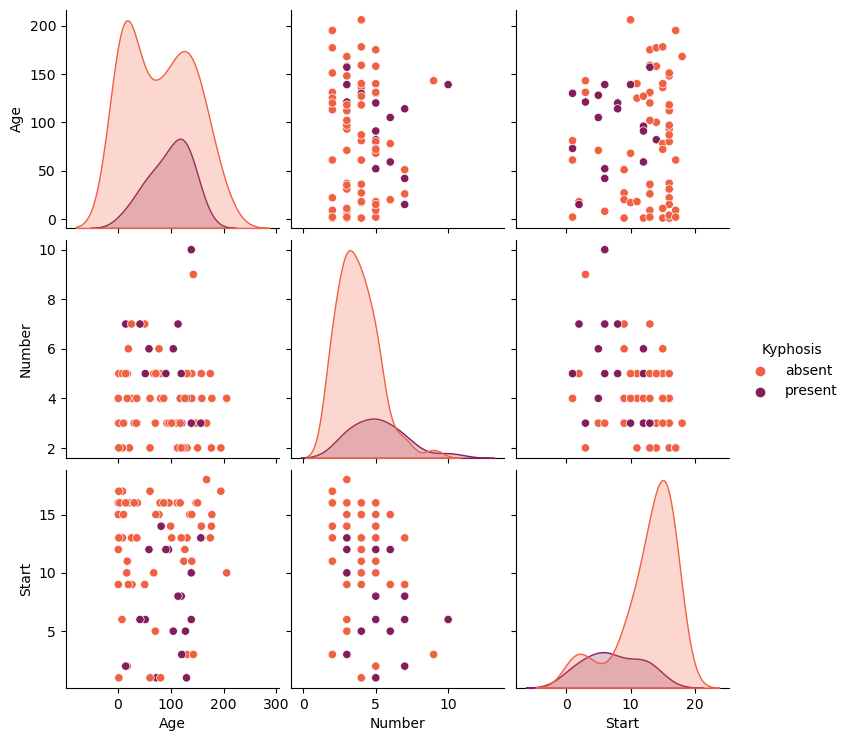

In [5]:
sns.pairplot(data, hue = 'Kyphosis', palette="rocket_r")

## Splitting Data 

In [8]:
from sklearn.model_selection import train_test_split

In [10]:
X = data.drop('Kyphosis', axis=1)
y = data['Kyphosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Model Selection and Evaluation

In [6]:
from sklearn.tree import DecisionTreeClassifier

In [7]:
dtree = DecisionTreeClassifier()

In [11]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [12]:
pred = dtree.predict(X_test)

### Metric for Evaluation

In [13]:
from sklearn.metrics import confusion_matrix, classification_report

In [14]:
print(classification_report(y_test, pred))
print('\n')
print(confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

      absent       0.67      0.71      0.69        17
     present       0.29      0.25      0.27         8

    accuracy                           0.56        25
   macro avg       0.48      0.48      0.48        25
weighted avg       0.54      0.56      0.55        25



[[12  5]
 [ 6  2]]


In [15]:
from sklearn.ensemble import RandomForestClassifier

In [16]:
rfc = RandomForestClassifier(n_estimators=200)

In [17]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [18]:
prediction = rfc.predict(X_test)

In [20]:
print(classification_report(y_test, prediction))
print('\n')
print(confusion_matrix(y_test, prediction))

              precision    recall  f1-score   support

      absent       0.74      1.00      0.85        17
     present       1.00      0.25      0.40         8

    accuracy                           0.76        25
   macro avg       0.87      0.62      0.62        25
weighted avg       0.82      0.76      0.71        25



[[17  0]
 [ 6  2]]
